# Duffing Oscillator

<b><i>What is a Duffing oscillator?</i></b>

It's a nonlinear second-order differential equation used to model certain damped and driven oscillators. The equation is given by

\begin{equation}
    \ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 = \gamma \cos(\omega t)
\end{equation}

Interpret the equation as a mass attached to a nonlinear spring and a linear damper where the restoring force of the spring is $\alpha x + \beta x^3$. This system is then driven by some driving force.


<b><i>What the hell are all those parameters?</i></b>

These parameters are: 

$\delta$ : controls the amount of damping (In physical systems, it's whatever process dissipates the energy)

$\alpha$ : controls the linear stiffness (objects resistance to deformation)

$\beta$ : controls the amount of non-linearity in the restoring force

$\gamma$ : amplitude of the driving force

$\omega$ : angular frequency of the periodic driving force

#### There's more conceptual stuff to talk about, but I'll just put the code below so I can work on a different system

## THE CODE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To use Runge-Kutta, we need to rewrite the equation as a 2 first-order ODEs.

The equation can be rewritten as:

\begin{align}
    \tfrac{dy_1}{dt} &= y_2 \\
    \tfrac{dy_2}{dt} &= - \delta y_2 - \alpha y_1 - \beta y_1^3 + \gamma \cos(\omega t)
\end{align}

The code below encodes this information into a function.

In [2]:
def f(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """

    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size

    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])

    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    ### In this specific example, we have copied the ODE system from Tao Peng about a driven pendulum

    a, b, d, w, g = 1, 0, 0.5, 1, 1

    v[0] = y[1]
    v[1] = - d*y[1] - b*y[0] - a*y[0]*y[0]*y[0] + g*np.cos(w*t)

    return v

Below is the code for defining the multi-dimensional Runge-Kutta method.

In [3]:
def multiRK4(y0, D, n):
    """
    This function runs the Runge-Kutta 4th Order method for a D-dimensional system of ODEs

    Parameters
    ----------
    y0: array (of dimension D)
        Initial conditions of the ODEs

    D : int
        Dimension (i.e. the amount of coordinates) needed for the system
    n : int
        Number of steps through time

    Returns
    -------
    The velocities of the particular coordinates of interest.
    """

    #Initializes the multi-dimensional array for solving the system of ODEs. The first 
    y = np.empty(shape = (n+1, D))
    t, dt = np.empty([n+1]), (2*np.pi)/100

    #Setting the initial conditions of the system
    if len(y0) < D: 
        print("The dimension of the initial conditions is less than required")
        return
    elif len(y0)  > D:
        print("The dimension of the initial conditions is more than required")
        return
    else:    
        y[0] = y0

    for i in range(0,n):

        #Solving for the coefficients
        k1 = dt*f(t[i], y[i])
        k2 = dt*f(t[i] + 0.5*dt, y[i] + 0.5*k1)
        k3 = dt*f(t[i] + 0.5*dt, y[i] + 0.5*k2)
        k4 = dt*f(t[i] + dt, y[i] + k3)

        #Iteraing through the function and time values
        y[i+1] = y[i] + (1/6)*k1 + (1/3)*k2 + (1/3)*k3 + (1/6)*k4
        t[i+1] = t[i] + dt

    return y.transpose()

We can now call the function and graph the phase portrait for the inital conditions $x(0) = 0$ and $\dot{x} = 2$.

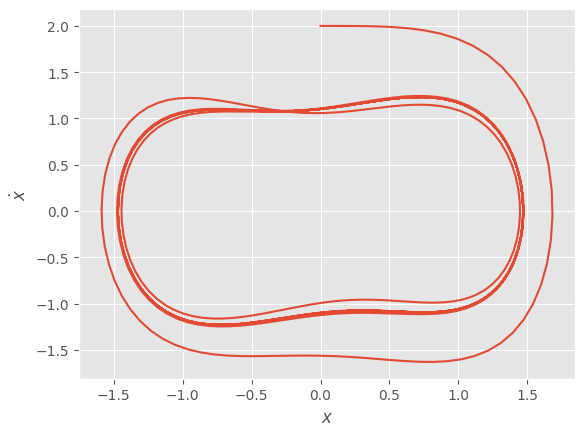

In [6]:
r = multiRK4([0,2], 2, 1000)

x = r[0]
y = r[1]

plt.style.use('ggplot')
plt.xlabel("$x$")
plt.ylabel("$\\dot{x}$")
plt.plot(x,y)
plt.show()